# <font size=5> Training competing methods on cross-species datasets as following (only need to be run once):  </font>



In [ ]:
# cd competing_methods/
# !Rscript cellid.R
# !Rscript scclassify.R
# !Rscript SingleCellNet_SingleR_scmap_Seurat.R # including {SingleCellNet, scmap, SingleR, Seurat-CCA, Seurat-PCA}
# !Rscript SingleR_scmap_Seurat_on_mouse_brain.R # including {scmap, SingleR, Seurat-PCA} on big-data (mouse brain)
# !python scanvi.py
# !python scNym.py
# cd /competing_methods/scGCN/scGCN
# !bash run_scGCN_all.sh

# <font size=5> Train GraphCS on cross-species data </font>

In [2]:
f=open('../cross-species.txt','w+')
f.close()
!bash run_cross-species.sh

Baron_mouse_Baron_human
[1] "Baron_mouse_Baron_human"
[1] "begin pre_process_data \n"
Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating gene variances
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating feature variances of standardized and clipped values
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating gene variances
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|

0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating gene variances
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating feature variances of standardized and clipped values
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Warning messages:
1: In dir.create(paste0("./data/", data_name)) :
  './data/Baron_human_Baron_mouse' already exists
2: In dir.create("./process_data") : './process_data' already exists
3: In dir.create(outputdir) :
  './process_data/Baron_hum

# <font size=5>Read results from  GraphCS<font size>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from matplotlib import cm
from matplotlib.pyplot import MultipleLocator
base='./'
savepath="cross-species"

In [3]:
with open('../'+savepath+'.txt','r+') as f:
    acc=[]
    for j in f:
        acc.append(float(j[:-1]))
    csv=pd.read_csv(savepath+'.csv',header=0,index_col=0)
    csv.loc['GraphCS']=acc
    csv.to_csv(savepath+'.csv')
    f.close()

# <font size=5>Plot Fig2d<font size>

In [11]:
def plot_bar_chart(mat, ngroup, title_list, save_name="cross_species"):
    weight = "bold"
    plt.figure(figsize=(30, 30))

    sp = [222, 223, 221, 224]
    for i, s in enumerate(sp):
        # sort
        mati = mat[i]
        ngroup_tmp = ngroup.copy()
        sort_index = np.argsort(mati)
        ngroup_tmp = np.asarray(ngroup_tmp)[sort_index]
        mati = mati[sort_index]

      
        # normalize
        norm_values = 0.4 + 0.5 * (mati - np.min(mati)) / (np.max(mat[i]) - np.min(mati))
        map_vir = cm.get_cmap(name='GnBu')
        colors = map_vir(norm_values)

        palette = sns.color_palette("Blues",14)

        plt.subplot(s)

        ax = sns.barplot(x=mati, y=ngroup_tmp, palette=palette, orient='h')
        ax.set_title(title_list[i], fontsize=39, y=1.01, fontweight=weight)
        plt.xticks(fontsize=35,weight=weight)
        plt.yticks(fontsize=35,weight=weight)
        ax.set_xlabel('Accuracy', fontsize=39, fontweight=weight)
        if s==221:
            ax.set_xlim([0.6, 1])
        elif  s==222:
            ax.set_xlim([0.2, 1])
        elif  s==223:
            ax.set_xlim([0.2, 1])
        else:
            ax.set_xlim([0.2, 1])
        #
        x_major_locator = MultipleLocator(0.2)
        ax.xaxis.set_major_locator(x_major_locator)
        
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_linewidth(4)
        ax.spines['bottom'].set_linewidth(4)
    plt.subplots_adjust(wspace =0.5, hspace =0.2)
    plt.savefig('./figures/{}.png'.format(save_name), format='png', dpi=400, bbox_inches='tight')
    plt.show()

               Baron_mouse-Baron_human  Baron_mouse-Segerstolpe  \
scANVI                        0.535809                 0.225254   
scNym                         0.556422                 0.496522   
scClassify                    0.830867                 0.850722   
CelliD(C)                     0.747357                 0.645265   
CelliD(G)                     0.712738                 0.632424   
SingleCellNet                 0.822410                 0.841091   
SingleR                       0.404598                 0.797218   
scamp                         0.828488                 0.962547   
Seurat-CCA                    0.860333                 0.734617   
Seurat-PCA                    0.575978                 0.566613   
scGCN                         0.910941                 0.909042   
GraphCS                       0.949260                 0.972713   

               Baron_human-Baron_mouse  Baron_mouse-Combination  
scANVI                        0.928266                 0.58592

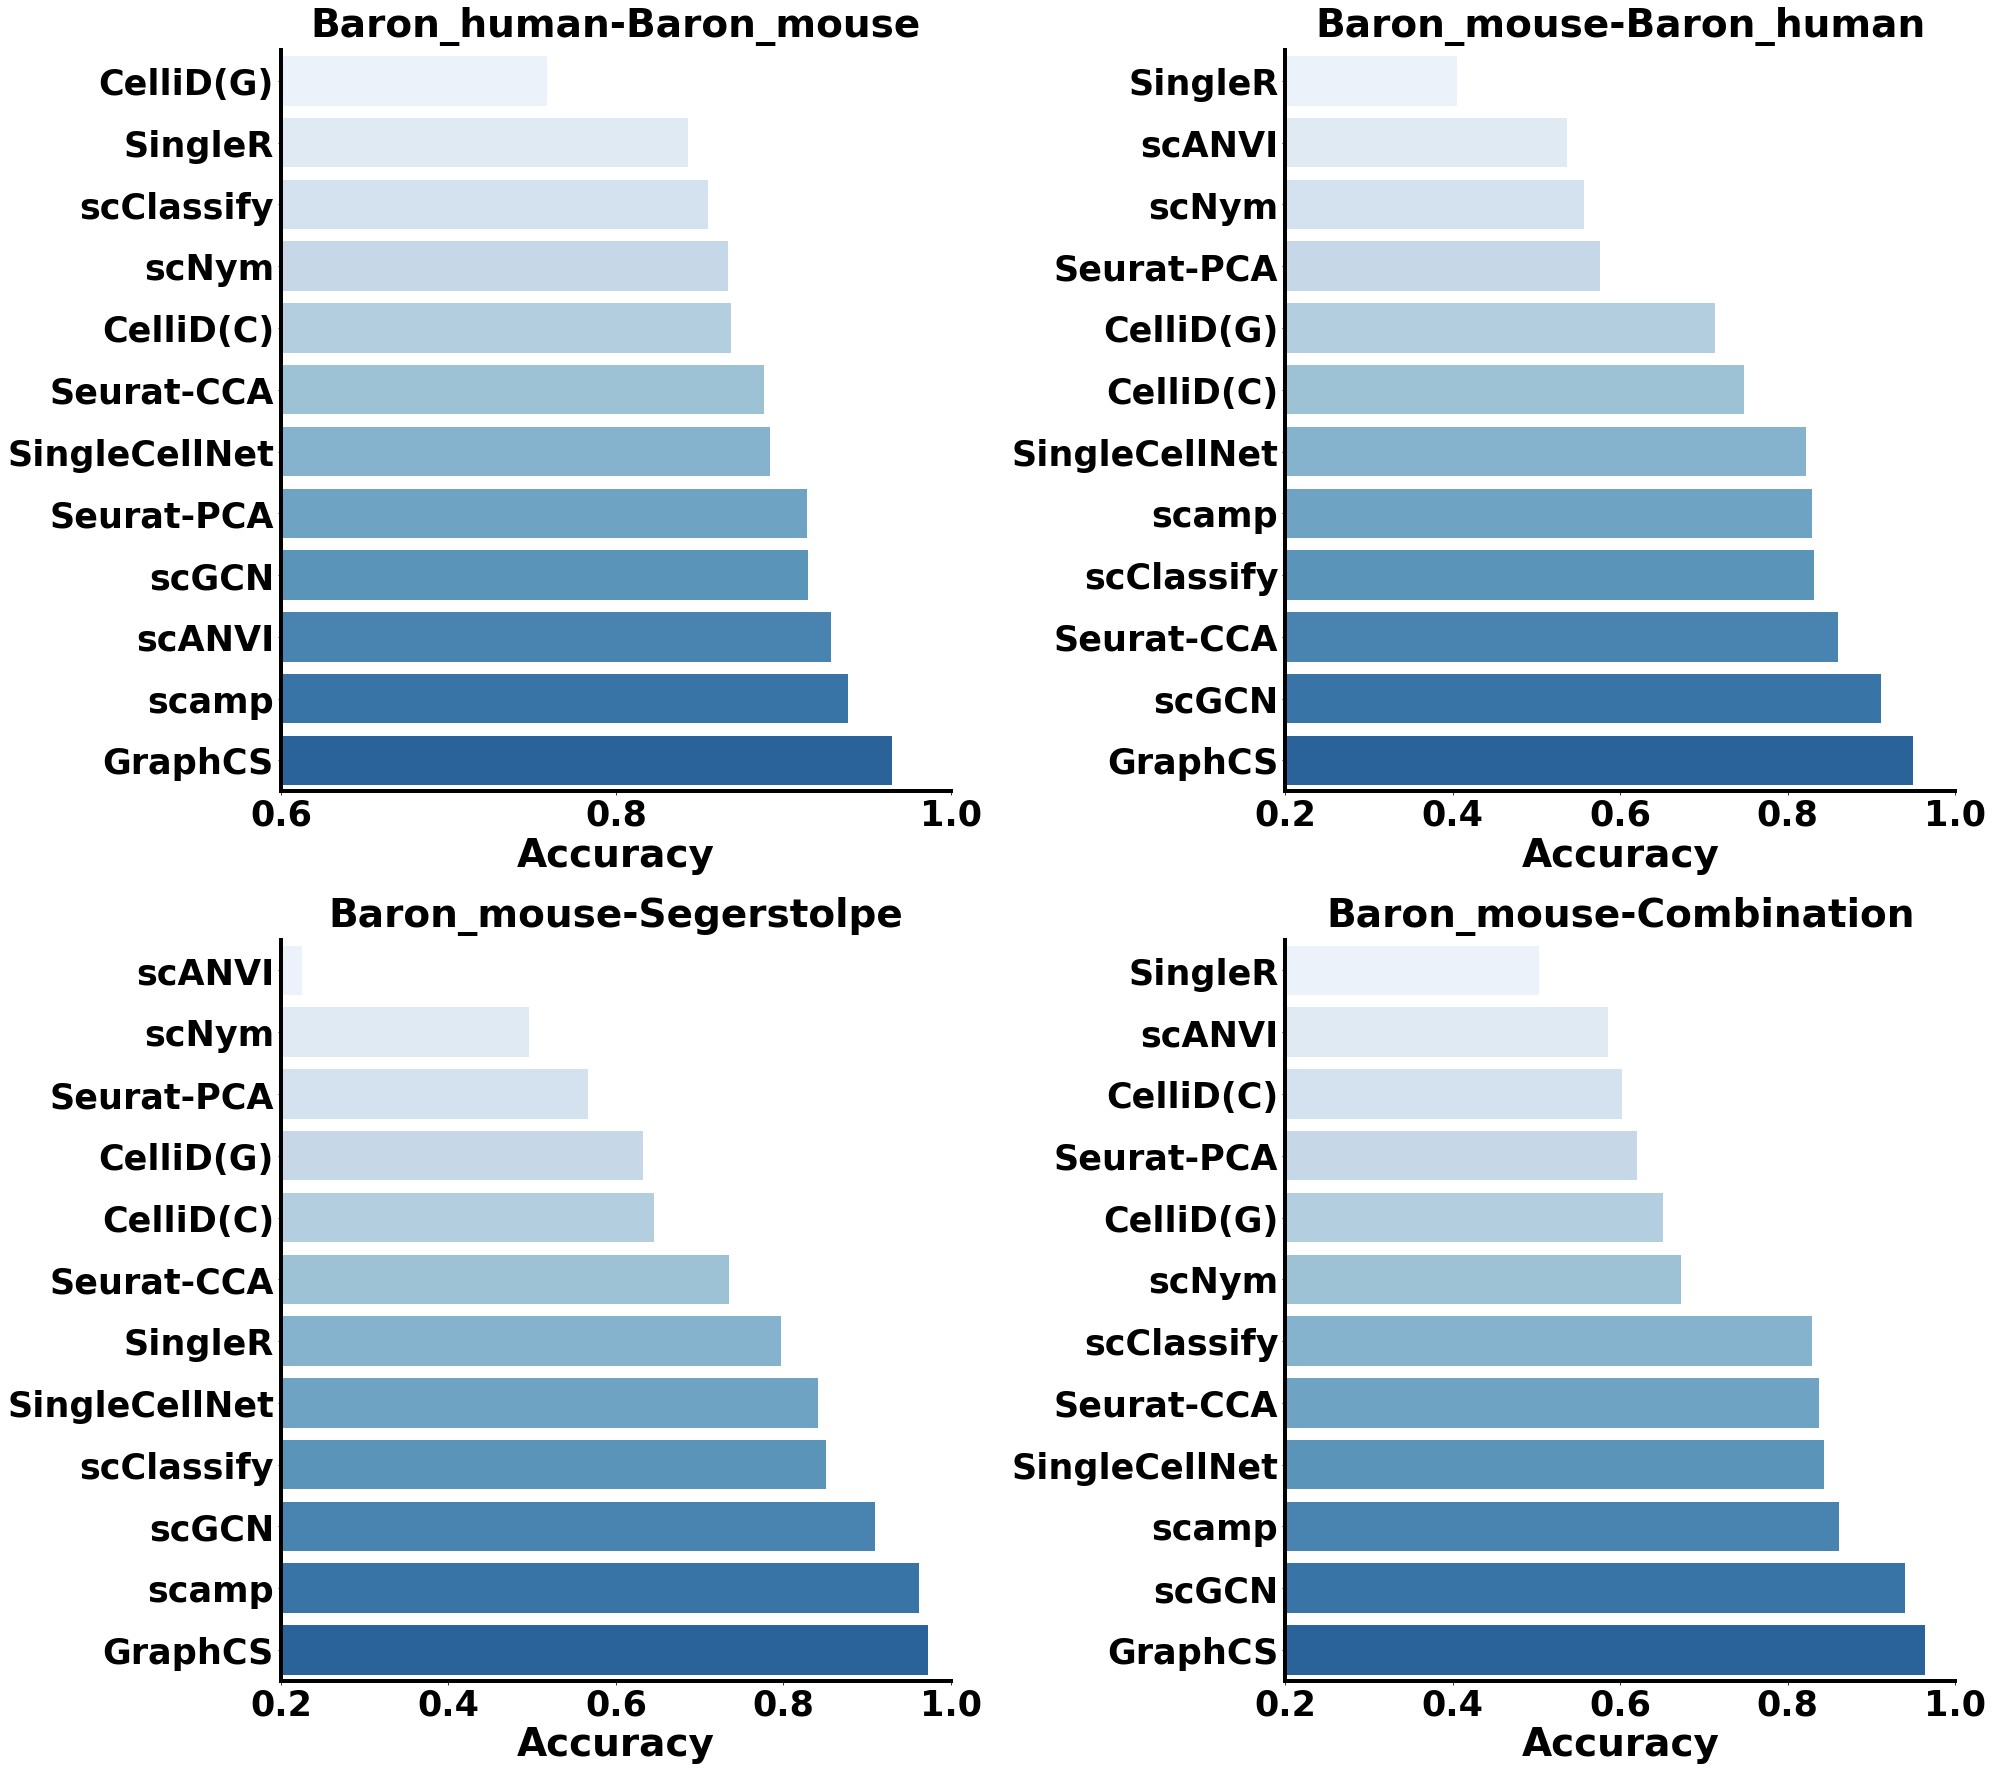

In [17]:
df = pd.read_csv(base+"cross-species.csv", index_col=0, header=0)
print(df)
mat = np.asarray(df).T
methods = df.index
plot_bar_chart(mat, methods, title_list=df.columns)